# Exercise 0

## Strong Scaling Test with wall-clock time

In order to test the strong scaling of codes, $N = 10^9$ chosen and from each program was run using from 1 (serial versions) to 20 threads. Both wall-clock time and elapsed time considered and tested for each step.

01_array_sum_output.txt speed up: [1.         1.97551078 3.83930992 6.76027407 7.71710233 7.95280571
 8.09099644]
06_touch_by_all_output.txt speed up: [ 1.          1.99257554  3.86824436  7.20652361 10.30201848 13.66230185
 16.8955089 ]


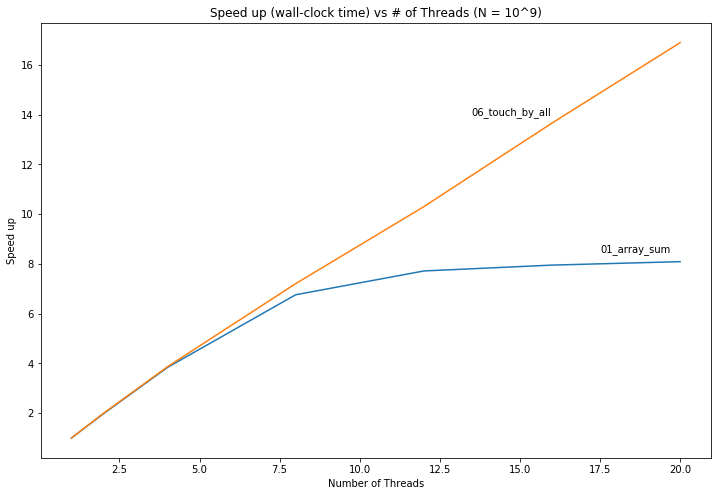

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (wall-clock time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed up")

plt.text(17.5,8.5,'01_array_sum',fontsize = 10)
plt.text(13.5,14,'06_touch_by_all',fontsize = 10)
output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:
    
    f = open(j, "r")
    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))
    plt.plot(number_of_processors,liste[0] / np.array(liste))
    print(f.name,"speed up:",liste[0] / np.array(liste))

Above plots shows us, touch by all and touch by first scale similar up to 4 threads, after this point touch by first stopped scaling and touch by all continued to scale.

## Strong Scaling Test with elapsed time

1 threads run has elapsed time:  6.19
2 threads run has elapsed time:  4.79
4 threads run has elapsed time:  4.11
8 threads run has elapsed time:  3.81
12 threads run has elapsed time:  3.77
16 threads run has elapsed time:  3.77
20 threads run has elapsed time:  3.78

 01_array_sum_output.txt speed up: [1.         1.29227557 1.50608273 1.62467192 1.64190981 1.64190981
 1.63756614] 

1 threads run has elapsed time:  6.19
2 threads run has elapsed time:  3.15
4 threads run has elapsed time:  1.62
8 threads run has elapsed time:  0.88
12 threads run has elapsed time:  0.62
16 threads run has elapsed time:  0.52
20 threads run has elapsed time:  0.48

 06_touch_by_all_output.txt speed up: [ 1.          1.96507937  3.82098765  7.03409091  9.98387097 11.90384615
 12.89583333] 



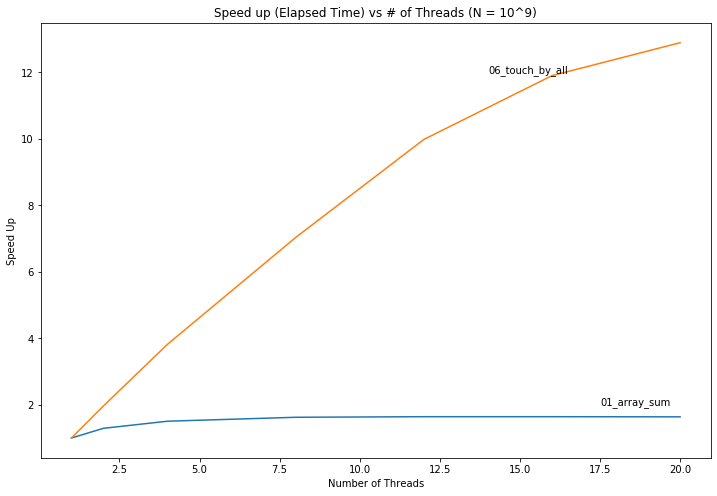

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")

plt.text(17.5,2,'01_array_sum',fontsize = 10)
plt.text(14,12,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1

    plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
    print("\n",f.name,"speed up:",elapsed_list[0]/np.array(elapsed_list),"\n")

Above plots shows us touch by all scales better than touch by first in terms of elapsed times. Actually touch by first doesn't scale at all. On the other hand touch by all scales very good up to 16 threads but after this point, appropriately to the Amdahl's Law it stoped scaling.

## Measure the overhead

For measuring overhead two methods applied. First for both code serial fractions are calculated to understand if there is overhead or not. After that to estimate it one of the optimistic formula is used.

Serial Fraction of 01_array_sum_output.txt : [0.0123964  0.0139513  0.02619771 0.05045344 0.06745791 0.07746755]
Serial Fraction of 06_touch_by_all_output.txt : [0.00372606 0.01135361 0.01572933 0.01498366 0.01140705 0.00967087]


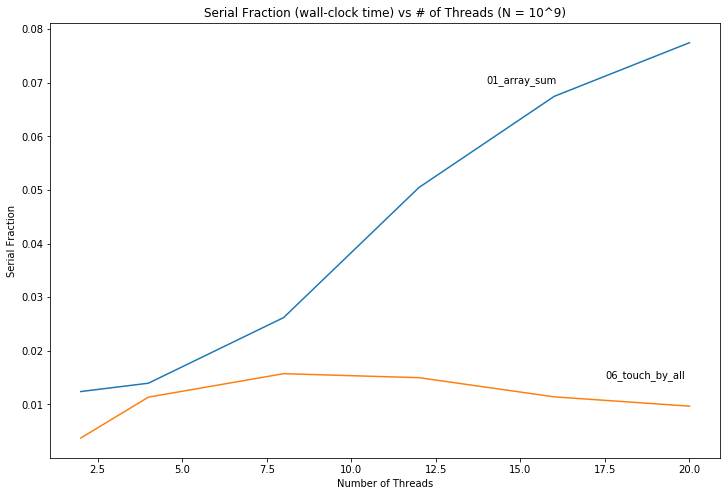

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.title("Serial Fraction (wall-clock time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")

plt.text(14,0.070,'01_array_sum',fontsize = 10)
plt.text(17.5,0.015,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

number_of_processors = [1,2,4,8,12,16,20]

for j in output_files:

    f = open(j, "r")

    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))

    Ts = liste[0]
    Tp = np.array(liste[1:])
    Sp = Ts/Tp
    p = number_of_processors[1:]
    enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
    print("Serial Fraction of",f.name,":",enp)    

    plt.plot(p,enp)

Serial Fraction of 01_array_sum_output.txt : [0.54765751 0.55196554 0.56058158 0.57350565 0.58298331 0.5901709 ]
Serial Fraction of 06_touch_by_all_output.txt : [0.0177706  0.01561659 0.01961689 0.01835806 0.02294023 0.02899413]


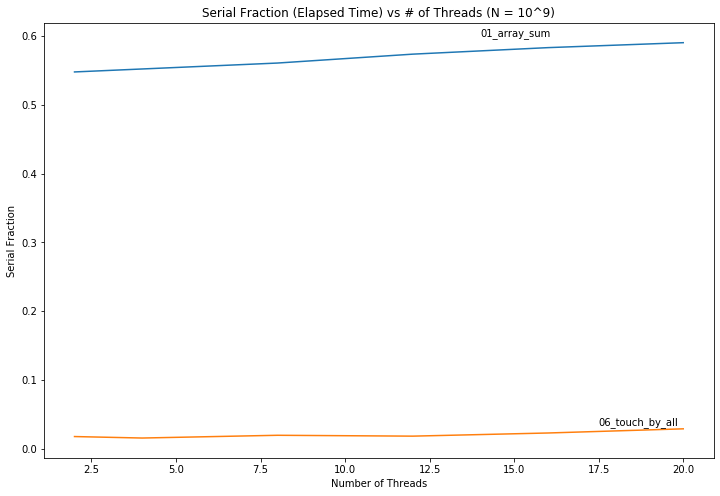

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Serial Fraction (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")

plt.text(14,0.60,'01_array_sum',fontsize = 10)
plt.text(17.5,0.035,'06_touch_by_all',fontsize = 10)


output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    
    Ts = elapsed_list[0]
    Tp = np.array(elapsed_list[1:])
    Sp = Ts/Tp
    p = number_of_processors[1:]
    enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
    print("Serial Fraction of",f.name,":",enp)
    plt.plot(p,enp)


According to serial fraction calculations change (increasing serial fraction means lack of scaling is also due to the parallelization overhead) on the other hand if it is stable lack of scaling is due to the serial workload

In order to measure estimated overhead for the codes, I have used general formula, overhead function $T_o = p \times T_p-T_S$ [reference (page 2)](https://www8.cs.umu.se/kurser/5DV050/VT11/F1b.pdf)

Overhead of 01_array_sum_output.txt : [0.       0.03476  0.11736  0.514216 1.556208 2.83732  4.12722 ]
Overhead of 06_touch_by_all_output.txt : [0.       0.01045  0.095526 0.308798 0.46225  0.479878 0.51533 ]


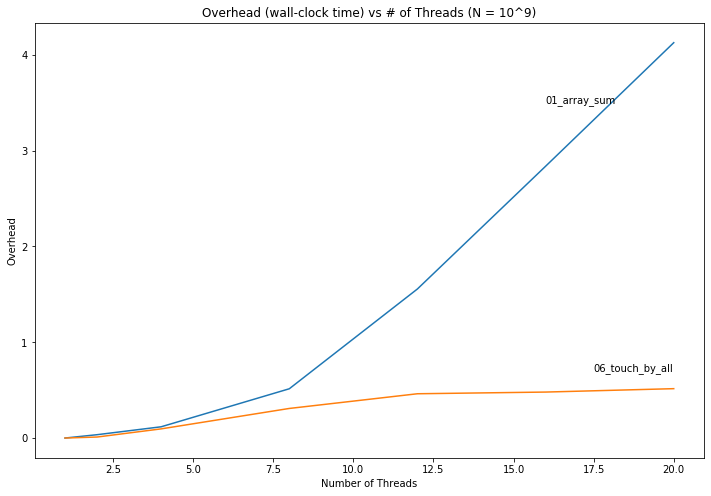

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.title("Overhead (wall-clock time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead")

plt.text(16,3.5,'01_array_sum',fontsize = 10)
plt.text(17.5,0.70,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

number_of_processors = [1,2,4,8,12,16,20]

for j in output_files:
    
    f = open(j, "r")

    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))

    Ts = liste[0]
    Tp = np.array(liste)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead of",f.name,":",To)    

    plt.plot(p,To)
    


Overhead of 01_array_sum_output.txt : [ 0.    3.39 10.25 24.29 39.05 54.13 69.41]
Overhead of 06_touch_by_all_output.txt : [0.   0.11 0.29 0.85 1.25 2.13 3.41]


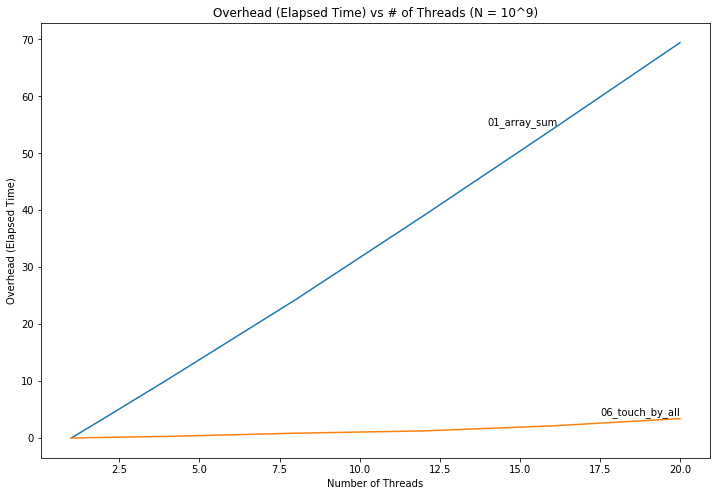

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Overhead (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead (Elapsed Time)")

plt.text(14,55,'01_array_sum',fontsize = 10)
plt.text(17.5,4,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    
    Ts = elapsed_list[0]
    Tp = np.array(elapsed_list)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead of",f.name,":", To)
    plt.plot(p,To)
    
plt.show()


In terms of overhead with the increasing number of computation units touch by first method's overhead increase too much so this situation shows us touch by all method is more efficient than touch by first method. In order to understand this difference, deeper analyze must be performed. According to this context these codes will be profilied by using perf.

## Profiling Codes with PERF

In order to specify difference between two codes, I have used perf to profile codes (collecting hardware, software events). There is no significant difference between two codes. In order to get statistically significant results data collection repeated 10 times. Results are from Ulysses (20 threads)

![Perf Results](perf_stat.png)

Since there is no significant difference between two codes. Chosen events and small differences will be explained.

Best case for cpu-cycle and instructions must be  multiple instructions are executed in a single cycle so in terms of instruction per cycle touch by all policy is better than touch by first but there is no big difference.

In terms of cache misses results for both code is similar even touch by first is bit better than touch by all. It seems that both codes don't perform well about cache so it cause execution delays by requiring the program to fetch the data from other cache level. (perf c2c will be used to analyze this event better)

Branch instructions and misses are more or less same for each codes and it looks efficient.

The cycles stalled in the front-end are waste because front-end doesn't feed the back-end but for these two code percentage is more or less same

Task clock shows time spent on the profiled task. So in this context we can say that touch by all policy is way better than touch by first since utilizaiton of CPU (with 20 threads) in other words parallelization of touch by all (usage of threads) are more efficient than touch by first.

To understand better, difference between two method perf c2c command used. In Ulyses perf c2c command can not be used so I used it in my local computer (with 8 threads). You can find my computers architecture and compiler info in readme file.

![Perf C2C](perf_c2c_results.png)

According to above image, touch by all (right) seems more efficient than touch by first (left) because the cache of each thread is warmed-up with the data. Cache hits are better for touch by all. There is no global shared cache line event for touch by first but touch by all has this event and naturally performs better.

# Exercise 1

I tried to openmp-ize serial application of monte carlo pi. After few trials and modifications I got better run times than serial one. 
During development process generating random numbers were bit hard, first I applied standard routines but estimations of pi was terrible. That is why I changed the way and with the help of Appendix 1 and some google search (drand48_r function requires structure) I could obtain better code. Also opening regular parallel regions (without specifying private, shared) doesn't give better results than the serial one.

*Refer the code openmp_pi.c*

## Weak and Strong Scalability

### Strong Scalability

Since elapsed time and walltime is more or less same, for this tests I'll only use elapsed time.

1 threads run has elapsed time:  19.66
2 threads run has elapsed time:  8.95
4 threads run has elapsed time:  4.62
8 threads run has elapsed time:  2.44
12 threads run has elapsed time:  1.72
16 threads run has elapsed time:  1.29
20 threads run has elapsed time:  1.03
Speed up: [ 1.          2.19664804  4.25541126  8.05737705 11.43023256 15.24031008
 19.08737864]


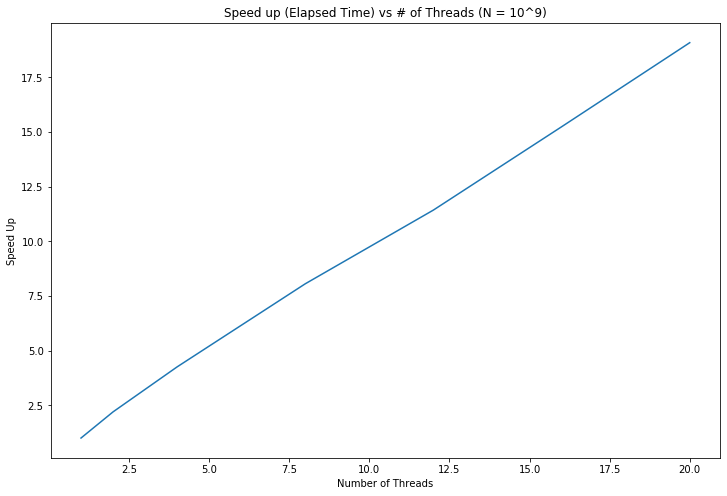

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")

f = open("strong_scaling_output.txt","r")

proc = 0
elapsed_list = []

for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1
#print("\n")
#print(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
print("Speed up:",elapsed_list[0]/np.array(elapsed_list))

plt.show()

According to result of program scales linearly for $N=10^9$.

### Weak Scaling

2 cores run has elapsed time:  17.99
4 cores run has elapsed time:  18.43
8 cores run has elapsed time:  19.49
12 cores run has elapsed time:  20.57
16 cores run has elapsed time:  20.6
20 cores run has elapsed time:  20.57


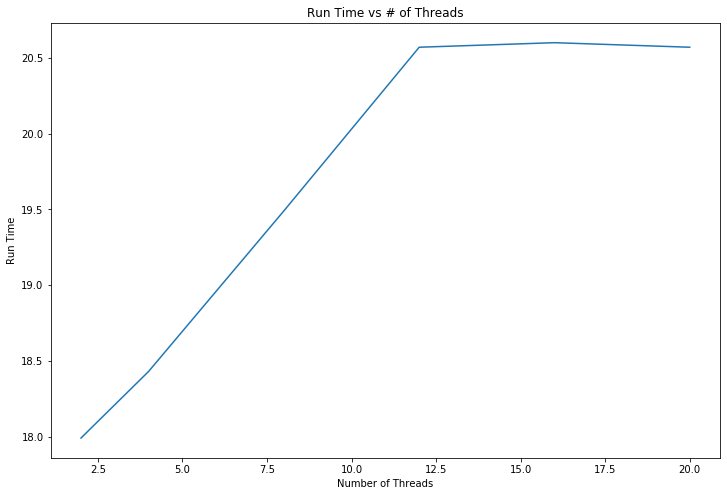

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [2,4,8,12,16,20]

f_weak = open("weak_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f_weak.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
            
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1


plt.figure(figsize = (12,8))
plt.title("Run Time vs # of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Run Time")
plt.plot(number_of_processors,elapsed_list)

plt.show()

According to logic of weak scalability when we increase the number of cores with the N run time
supposed to be same. However for this example there are small differences. There might be some
room for optimization of parallelization part. But after 12 threads run time became more or less constant which is good. 

### Parallel Overhead

Serial Fraction strong_scaling_output.txt : [-0.08952187 -0.02000678 -0.00101729  0.00453158  0.00332316  0.00251646]


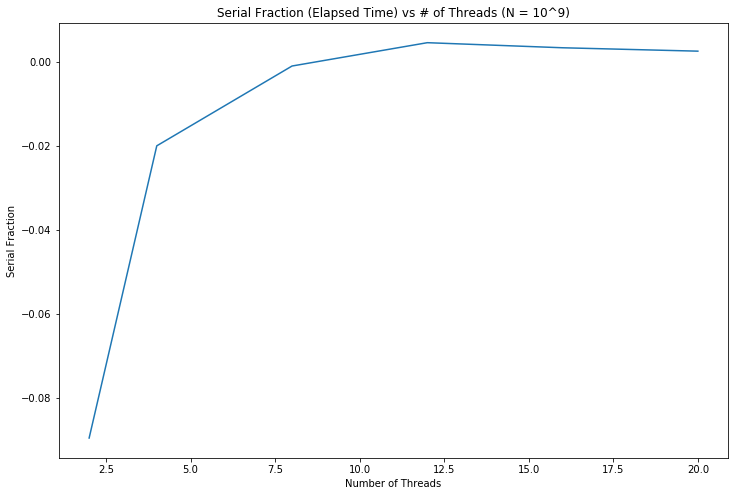

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Serial Fraction (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")


f = open("strong_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1

Ts = elapsed_list[0]
Tp = np.array(elapsed_list[1:])
Sp = Ts/Tp
p = number_of_processors[1:]
enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
print("Serial Fraction",f.name,":",enp)
plt.plot(p,enp)

For serial fraction, above plot shows us first there is increase (which my be due to the overhead) after that it became mor or less constant so in order to estimate overhead $p \times Tp - Ts$ will be used.

Overhead for strong_scaling_output.txt : [ 0.   -1.76 -1.18 -0.14  0.98  0.98  0.94]


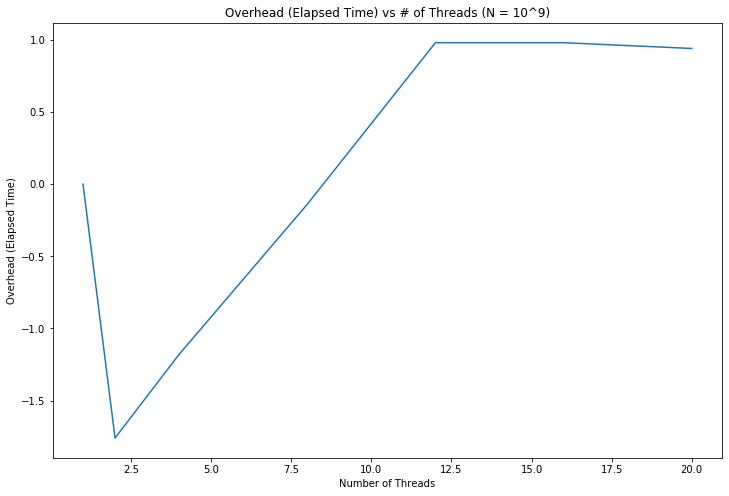

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Overhead (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead (Elapsed Time)")


f = open("strong_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1

Ts = elapsed_list[0]
Tp = np.array(elapsed_list)
p = number_of_processors
To = p * Tp - Ts
print("Overhead for",f.name,":", To)
plt.plot(p,To)




Similar to strong scaling results, program scales perfectly up to 16 threads but after because of overhead it slowed down. It means that there might be still room for parallel optimizaiton especially for higher number of threads (16 and 20)

### Comparing with OpenMPI

In order the compare mpi approach and openmp approach, I tested the runtime of mpi program and check the strong scalability.

1 cores run has elapsed time:  21.5
2 cores run has elapsed time:  11.79
4 cores run has elapsed time:  6.69
8 cores run has elapsed time:  4.33
12 cores run has elapsed time:  3.6
16 cores run has elapsed time:  3.18
20 cores run has elapsed time:  2.95
Speed up: [1.         1.8235793  3.21375187 4.96535797 5.97222222 6.76100629
 7.28813559]
1 cores run has elapsed time:  19.66
2 cores run has elapsed time:  8.95
4 cores run has elapsed time:  4.62
8 cores run has elapsed time:  2.44
12 cores run has elapsed time:  1.72
16 cores run has elapsed time:  1.29
20 cores run has elapsed time:  1.03
Speed up: [ 1.          2.19664804  4.25541126  8.05737705 11.43023256 15.24031008
 19.08737864]


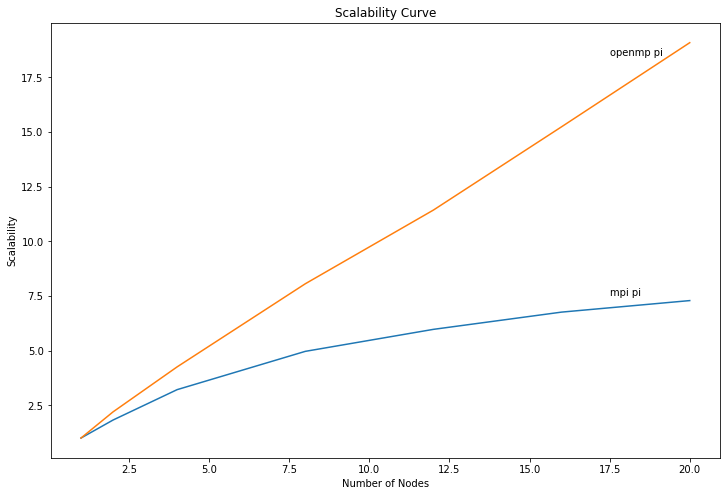

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Scalability Curve")
plt.xlabel("Number of Nodes")
plt.ylabel("Scalability")

plt.text(17.5,18.5,'openmp pi',fontsize = 10)
plt.text(17.5,7.5,'mpi pi',fontsize = 10)

file_list = ["strong_scaling_mpi_output.txt","strong_scaling_output.txt"]
 
for file in file_list:  
    
    f = open(file, "r")
    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                print(number_of_processors[proc], "cores run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                print(number_of_processors[proc], "cores run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
    print("Speed up:",elapsed_list[0]/np.array(elapsed_list))
    
    plt.savefig('exercise_1_compare_openmp_with_mpi.png')
plt.show()
    

According to this comparasion, in single node openmp performs better than mpi paradigm. (scalability and run time is better than mpi paradigm.) MPI program stoppe scaling after 8 cores but openmp scaled linearly up to 20 threads.

### Multiple Node Comparision

In order to understand difference between openmp and mpi paradigm same test will be done for multiple nodes with the same number of cores (I got 4 nodes and 5 cores for each node). In this way impact of network and shared memory implementation of mpi will be better understood.

1 cores run has elapsed time:  21.86
2 cores run has elapsed time:  11.96
4 cores run has elapsed time:  7.07
8 cores run has elapsed time:  4.6
12 cores run has elapsed time:  3.68
16 cores run has elapsed time:  4.16
20 cores run has elapsed time:  3.95
Speed up:  [1.         1.8277592  3.09193777 4.75217391 5.94021739 5.25480769
 5.53417722]
1 cores run has elapsed time:  19.68
2 cores run has elapsed time:  9.27
4 cores run has elapsed time:  4.83
8 cores run has elapsed time:  4.31
12 cores run has elapsed time:  4.07
16 cores run has elapsed time:  4.1
20 cores run has elapsed time:  4.06
Speed up:  [1.         2.12297735 4.07453416 4.56612529 4.83538084 4.8
 4.84729064]


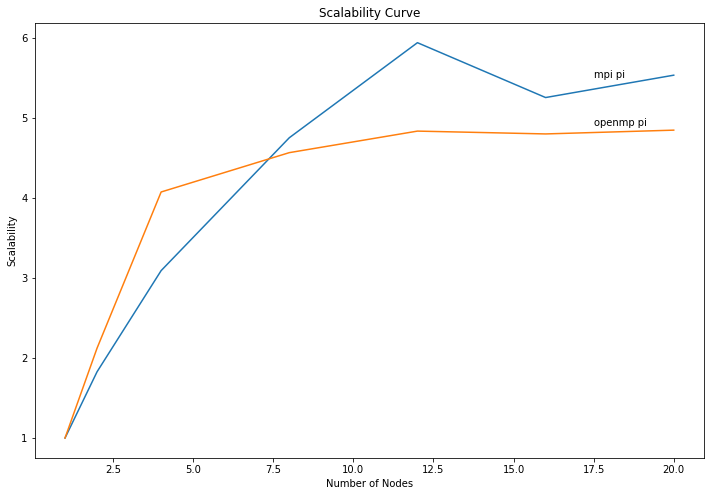

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]


plt.figure(figsize = (12,8))
plt.title("Scalability Curve")
plt.xlabel("Number of Nodes")
plt.ylabel("Scalability")

plt.text(17.5,4.9,'openmp pi',fontsize = 10)
plt.text(17.5,5.5,'mpi pi',fontsize = 10)

file_list = ["strong_scaling_mpi_output_4node.txt","strong_scaling_output_4node.txt"]

for file in file_list:
    
    f = open(file, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                print(number_of_processors[proc], "cores run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                print(number_of_processors[proc], "cores run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
    print("Speed up: ",elapsed_list[0]/np.array(elapsed_list))
    
    plt.savefig('Exercise_1_multiple_compare_openmp_with_mpi.png')
plt.show()
    

This plot shows us, in multiple nodes mpi paradigm works better. Openmp program didn't scale after 8 threads which is bigger than 5 so in this run there must be communication between nodes. In conclusion communicaiton overhead between nodes is higher for openmp than mpi paradigm which make sense. Another different fact that both program has very bad runtime for 16 computing units, at 16 program had to use fourth node (5 + 5 + 5 + 1) so it may cause extra overhead.

    - Optional part üzerine çalışılacak
    - kullandığım bash scriptlerinden bahsedilecek, özellikle weak scaling kısmında ve o kısmın başlığı düzenlenecek
    - Super scalability kısmına bakılacak tekrar dene aynısı olursa neden böyle olduğuna dair bir yorum üretmeye çalış
    - Genel olarak yorum kısımları (ne yaptığım ve elde ettiğim sonuçları yorumlama kısımları zenginleştirilecek)